In [109]:
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image

Change photo dimensions

In [110]:
with Image.open("Original_Image.png") as im:
    # Resize the image to a smaller size
    im_resized = im.resize((im.width//2,im.height//2))
    # Save the resized image
    im_resized.save('Fingerprint.png')

Load fingerprint image


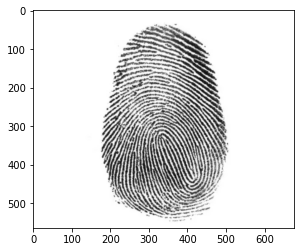

In [111]:
Original_Image = cv.imread('Original_Image.png')
plt.imshow(Original_Image)

In [112]:
image = cv.imread('Fingerprint.png')

grayscale

In [113]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

remove noise

In [114]:
blur_image = cv.GaussianBlur(gray_image , (5,5) , 0)

convert image to binary

In [115]:
thresh_image = cv.adaptiveThreshold(blur_image, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 11, 2)

remove small holes and gaps in the image

In [116]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
closing = cv.morphologyEx(thresh_image, cv.MORPH_CLOSE, kernel)

Finding contours in the image

In [117]:
contours, _ = cv.findContours(closing, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

Draw contours on original image

In [118]:
cv.drawContours(image, contours, -1, (0, 0, 255), 2)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

### final image

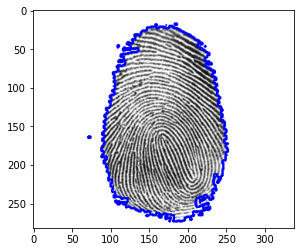

In [119]:
plt.imshow(image)

### Thresholded Image

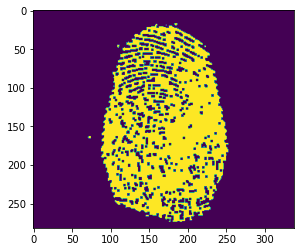

In [120]:
plt.imshow(closing)